In [2]:
import pandas as pd

dataset = pd.read_csv(r"D:\HEPro AI-ML internship deliverables\students_updated.csv")
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_id              110 non-null    object 
 1   age                     110 non-null    int64  
 2   program                 110 non-null    object 
 3   semester                110 non-null    int64  
 4   gpa                     110 non-null    float64
 5   attendance              110 non-null    int64  
 6   assignments_completion  110 non-null    int64  
 7   stress_levels           110 non-null    int64  
 8   sleep_hours             110 non-null    float64
 9   mental_wellbeing        110 non-null    int64  
 10  prouductivity_score     110 non-null    int64  
 11  distractions            110 non-null    int64  
 12  career_clarity          110 non-null    int64  
 13  skill_readiness         110 non-null    int64  
 14  engagement_score        110 non-null    in

In [3]:
dataset["gpa_score"] = (dataset["gpa"] / 10) * 100

dataset["stress_score"] = (10 - dataset["stress_levels"]) * 10

dataset["sleep_score"] = (dataset["sleep_hours"] / 8) * 100
dataset["sleep_score"] = dataset["sleep_score"].clip(upper=100)

dataset["mental_wellbeing_score"] = (dataset["mental_wellbeing"] / 10) * 100

dataset["distraction_score"] = (10 - dataset["distractions"]) * 10

dataset["career_clarity_score"] = (dataset["career_clarity"] / 10) * 100

dataset["skill_readiness_score"] = (dataset["skill_readiness"] / 10) * 100



In [4]:
list(dataset.columns)

['student_id',
 'age',
 'program',
 'semester',
 'gpa',
 'attendance ',
 'assignments_completion',
 'stress_levels',
 'sleep_hours',
 'mental_wellbeing',
 'prouductivity_score',
 'distractions',
 'career_clarity',
 'skill_readiness',
 'engagement_score',
 'gpa_score',
 'stress_score',
 'sleep_score',
 'mental_wellbeing_score',
 'distraction_score',
 'career_clarity_score',
 'skill_readiness_score']

In [5]:
dataset.columns = dataset.columns.str.strip()

In [6]:
list(dataset.columns)

['student_id',
 'age',
 'program',
 'semester',
 'gpa',
 'attendance',
 'assignments_completion',
 'stress_levels',
 'sleep_hours',
 'mental_wellbeing',
 'prouductivity_score',
 'distractions',
 'career_clarity',
 'skill_readiness',
 'engagement_score',
 'gpa_score',
 'stress_score',
 'sleep_score',
 'mental_wellbeing_score',
 'distraction_score',
 'career_clarity_score',
 'skill_readiness_score']

In [7]:
dataset["APS"] = (
    0.5 * dataset["gpa_score"] +
    0.3 * dataset["attendance"] +
    0.2 * dataset["assignments_completion"]
)


In [8]:
dataset["WWS"] = (
    0.4 * dataset["stress_score"] +
    0.4 * dataset["sleep_score"] +
    0.2 * dataset["mental_wellbeing_score"]
)

In [9]:
dataset["PTMS"] = (
    0.4 * dataset["prouductivity_score"] +
    0.3 * dataset["distraction_score"] +
    0.3 * dataset["assignments_completion"]
)


In [10]:
dataset["CRS"] = (
    0.4 * dataset["career_clarity_score"] +
    0.4 * dataset["skill_readiness_score"] +
    0.2 * dataset["engagement_score"]
)

In [11]:
dataset["SRI"] = (
    0.3 * dataset["APS"] +
    0.25 * dataset["WWS"] +
    0.25 * dataset["PTMS"] +
    0.2 * dataset["CRS"]
)


In [12]:
def classify_student(sri):
    if sri >= 80:
        return "Green"
    elif sri >= 65:
        return "Blue"
    elif sri >= 50:
        return "Yellow"
    else:
        return "Red"

dataset["Category"] = dataset["SRI"].apply(classify_student)

In [13]:
dataset[
    ["student_id", "APS", "WWS", "PTMS", "CRS", "SRI", "Category"]
].sample(60)

,student_id,APS,WWS,PTMS,CRS,SRI,Category
45,S046,71.9,69.5,35.7,56.2,59.110,Yellow
36,S037,86.3,56.0,51.5,43.8,61.525,Yellow
67,S068,79.3,56.0,50.4,45.2,59.430,Yellow
83,S084,87.2,88.0,85.1,77.2,84.875,Green
48,S049,84.9,61.5,39.6,78.4,66.425,Blue
42,S043,89.9,63.5,38.4,52.8,63.005,Yellow
52,S053,64.5,66.5,43.9,48.2,56.590,Yellow
93,S094,77.9,63.5,61.0,70.2,68.535,Blue
29,S030,74.6,54.0,42.7,55.0,57.555,Yellow
58,S059,87.8,52.0,30.7,66.4,60.295,Yellow


In [14]:
dataset["Category"].value_counts()

dataset["Category"].value_counts(normalize=True) * 100



Category
Yellow    58.181818
Blue      20.909091
Red       11.818182
Green      9.090909
Name: proportion, dtype: float64

In [15]:
dataset.to_csv("students_updated_SRI.csv", index=False)

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_id              110 non-null    object 
 1   age                     110 non-null    int64  
 2   program                 110 non-null    object 
 3   semester                110 non-null    int64  
 4   gpa                     110 non-null    float64
 5   attendance              110 non-null    int64  
 6   assignments_completion  110 non-null    int64  
 7   stress_levels           110 non-null    int64  
 8   sleep_hours             110 non-null    float64
 9   mental_wellbeing        110 non-null    int64  
 10  prouductivity_score     110 non-null    int64  
 11  distractions            110 non-null    int64  
 12  career_clarity          110 non-null    int64  
 13  skill_readiness         110 non-null    int64  
 14  engagement_score        110 non-null    in

In [16]:
dataset.rename(columns={
    "stress_levels": "stress_level",
    "prouductivity_score": "productivity_score"
}, inplace=True)

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     110 non-null    int64  
 1   program                 110 non-null    object 
 2   semester                110 non-null    int64  
 3   gpa                     110 non-null    float64
 4   attendance              110 non-null    int64  
 5   assignments_completion  110 non-null    int64  
 6   stress_level            110 non-null    int64  
 7   sleep_hours             110 non-null    float64
 8   mental_wellbeing        110 non-null    int64  
 9   productivity_score      110 non-null    int64  
 10  distractions            110 non-null    int64  
 11  career_clarity          110 non-null    int64  
 12  skill_readiness         110 non-null    int64  
 13  engagement_score        110 non-null    int64  
 14  gpa_score               110 non-null    fl

In [ ]:
dataset = dataset.drop(columns=["student_id"])

KeyError: "['student_id'] not found in axis"

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     110 non-null    int64  
 1   program                 110 non-null    object 
 2   semester                110 non-null    int64  
 3   gpa                     110 non-null    float64
 4   attendance              110 non-null    int64  
 5   assignments_completion  110 non-null    int64  
 6   stress_level            110 non-null    int64  
 7   sleep_hours             110 non-null    float64
 8   mental_wellbeing        110 non-null    int64  
 9   productivity_score      110 non-null    int64  
 10  distractions            110 non-null    int64  
 11  career_clarity          110 non-null    int64  
 12  skill_readiness         110 non-null    int64  
 13  engagement_score        110 non-null    int64  
 14  gpa_score               110 non-null    fl

In [27]:
dataset["Category"].unique()

array(['Yellow', 'Blue', 'Red', 'Green'], dtype=object)

In [28]:
dataset["program"].unique()

array(['B.Tech', 'MBA'], dtype=object)

In [29]:
category_labels = dataset["Category"]
dataset = dataset.drop(columns=["Category"])


In [30]:
dataset = pd.get_dummies(dataset, columns=["program"], drop_first=True)

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     110 non-null    int64  
 1   semester                110 non-null    int64  
 2   gpa                     110 non-null    float64
 3   attendance              110 non-null    int64  
 4   assignments_completion  110 non-null    int64  
 5   stress_level            110 non-null    int64  
 6   sleep_hours             110 non-null    float64
 7   mental_wellbeing        110 non-null    int64  
 8   productivity_score      110 non-null    int64  
 9   distractions            110 non-null    int64  
 10  career_clarity          110 non-null    int64  
 11  skill_readiness         110 non-null    int64  
 12  engagement_score        110 non-null    int64  
 13  gpa_score               110 non-null    float64
 14  stress_score            110 non-null    in

array([[<Axes: title={'center': 'gpa_score'}>,
        <Axes: title={'center': 'stress_score'}>,
        <Axes: title={'center': 'sleep_score'}>],
       [<Axes: title={'center': 'mental_wellbeing_score'}>,
        <Axes: title={'center': 'career_clarity_score'}>,
        <Axes: title={'center': 'skill_readiness_score'}>],
       [<Axes: title={'center': 'APS'}>, <Axes: title={'center': 'WWS'}>,
        <Axes: title={'center': 'PTMS'}>],
       [<Axes: title={'center': 'CRS'}>, <Axes: >, <Axes: >]],
      dtype=object)

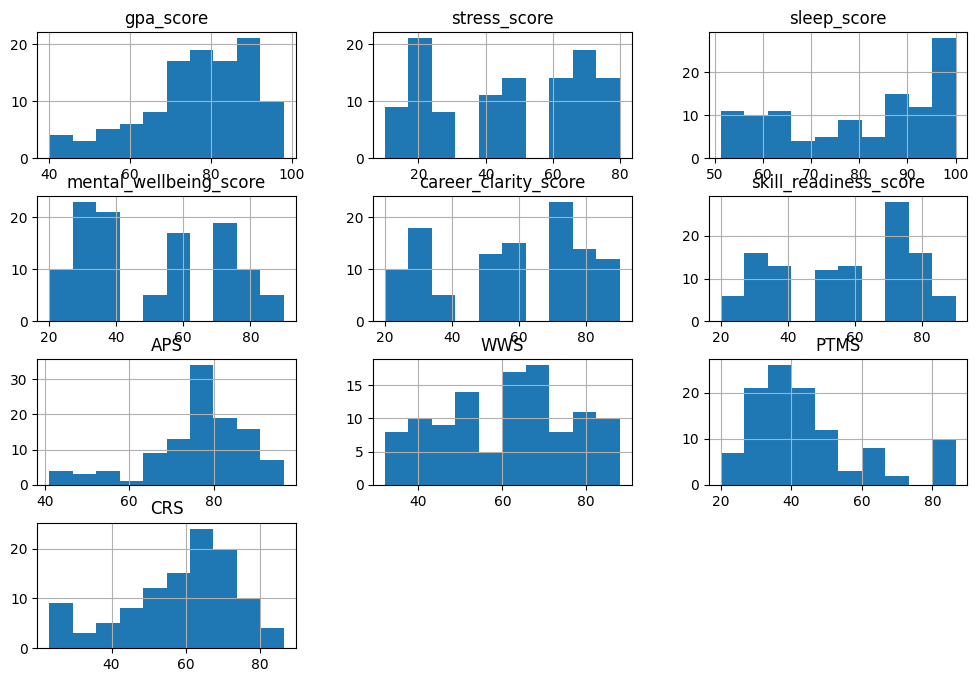

In [35]:
import matplotlib.pyplot as plt

dataset[
  [
        "gpa_score",
        "stress_score",
        "sleep_score",
        "mental_wellbeing_score",
        "career_clarity_score",
        "skill_readiness_score",
        "APS",
        "WWS",
        "PTMS",
        "CRS"
    ]
].hist(figsize=(12, 8))


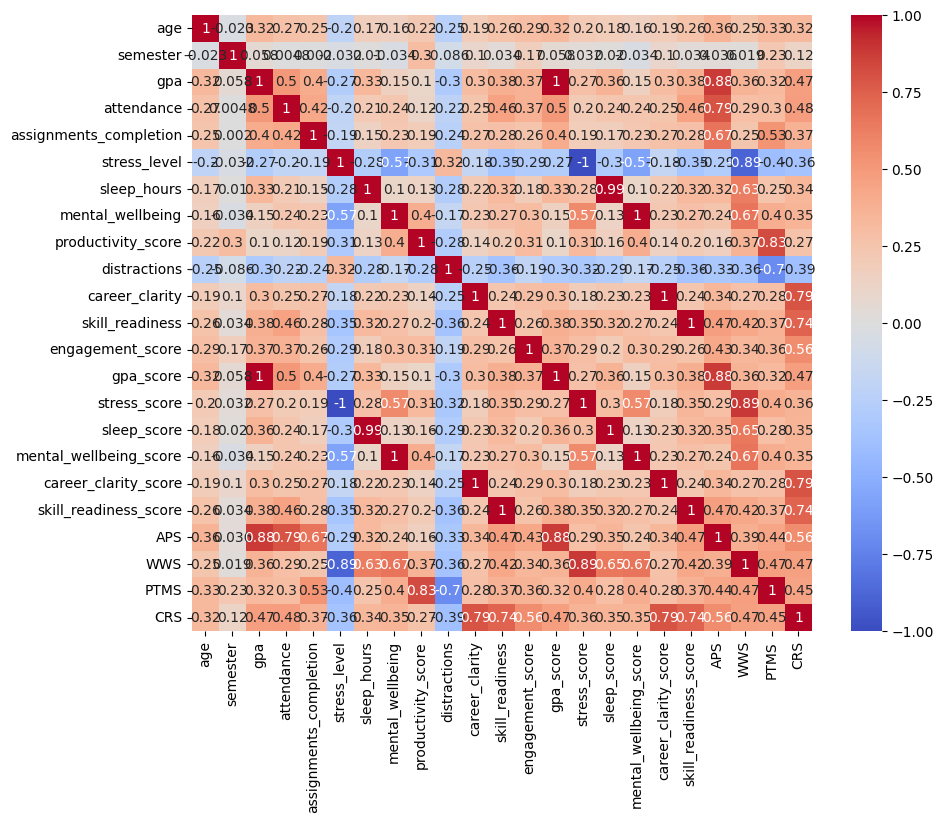

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(
    dataset[
        [
            "age",  
            "semester",  
            "gpa",
            "attendance",
            "assignments_completion",
            "stress_level",
            "sleep_hours",
            "mental_wellbeing",
            "productivity_score",
            "distractions",
            "career_clarity",
            "skill_readiness",
            "engagement_score",
            "gpa_score",
            "stress_score",
            "sleep_score",
            "mental_wellbeing_score",
            "career_clarity_score",
            "skill_readiness_score",
            "APS",
            "WWS",
            "PTMS",
            "CRS"
        ]
    ].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.show()


In [41]:
features = dataset[
    [
        "gpa_score",
        "stress_score",
        "sleep_score",
        "mental_wellbeing_score",
        "career_clarity_score",
        "skill_readiness_score",
        "APS",
        "WWS",
        "PTMS",
        "CRS",
        "SRI"
    ]
]


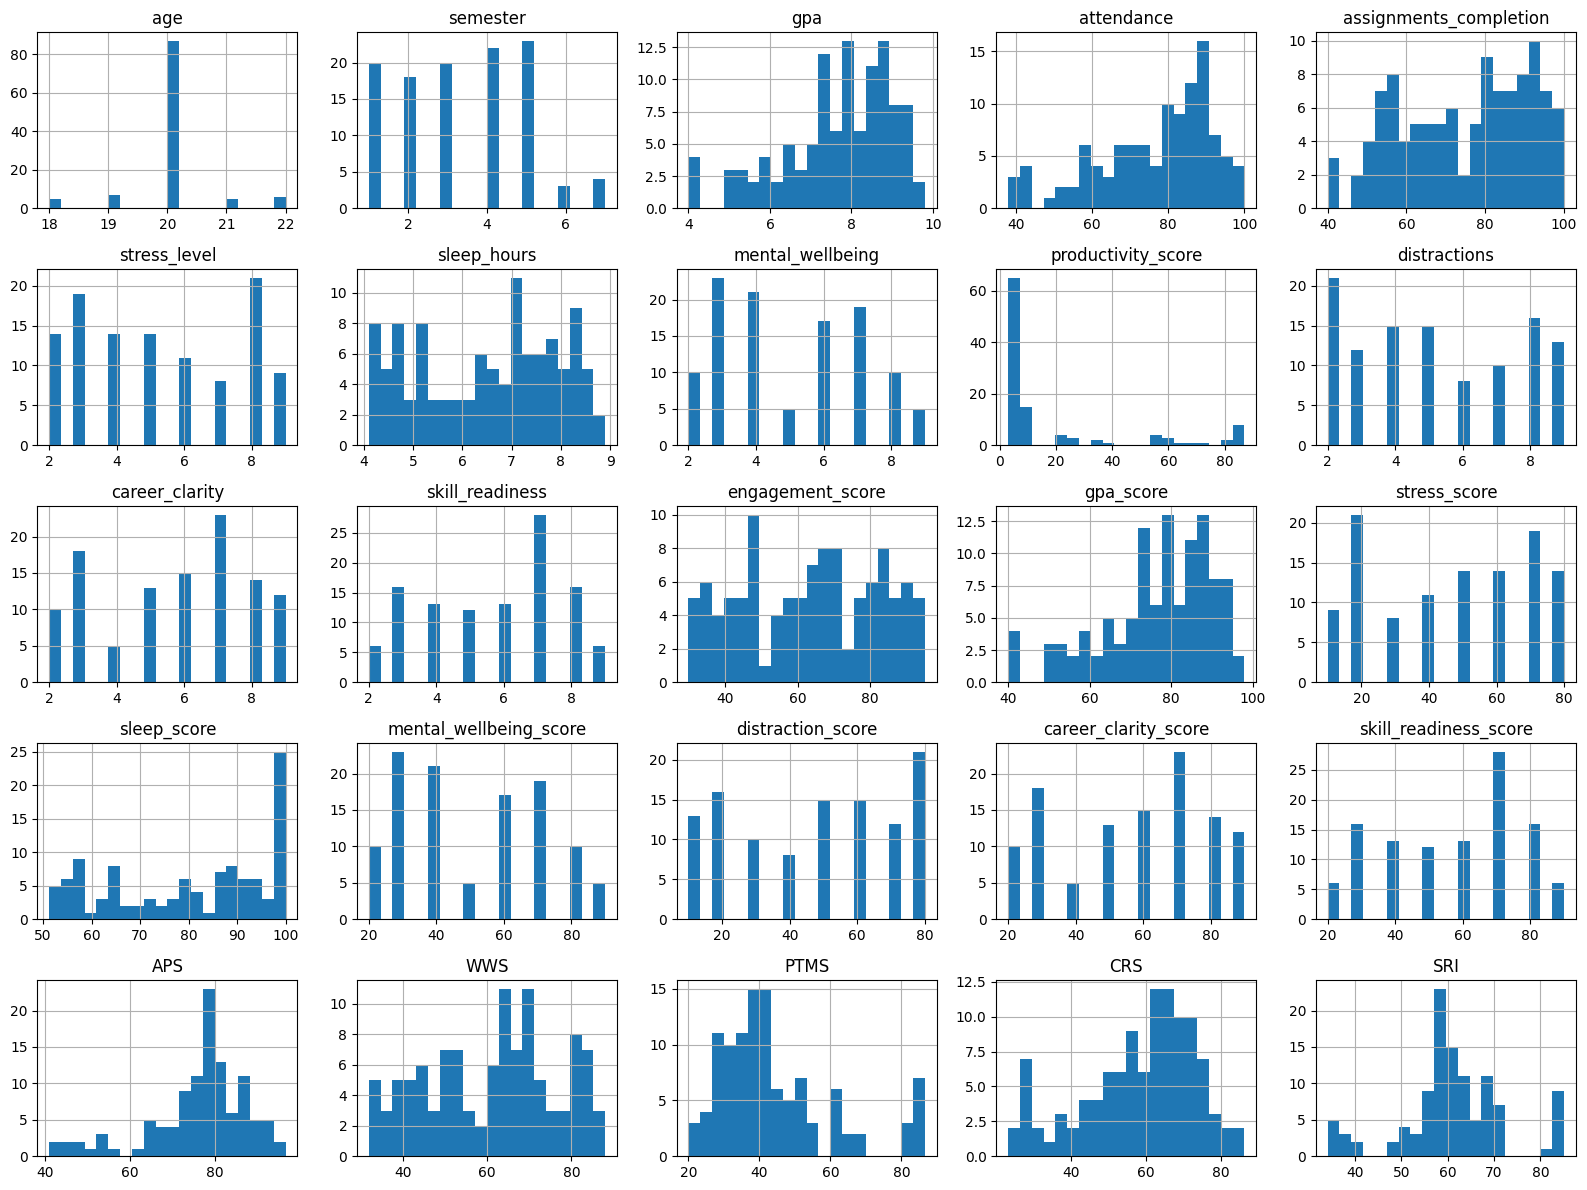

In [42]:
import matplotlib.pyplot as plt

numeric_cols = dataset.select_dtypes(include="number")

numeric_cols.hist(
    figsize=(16, 12),
    bins=20
)

plt.tight_layout()
plt.show()


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


In [44]:
from sklearn.cluster import KMeans

wcss = []

K = range(2, 11)  # avoid k=1, start from 2

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


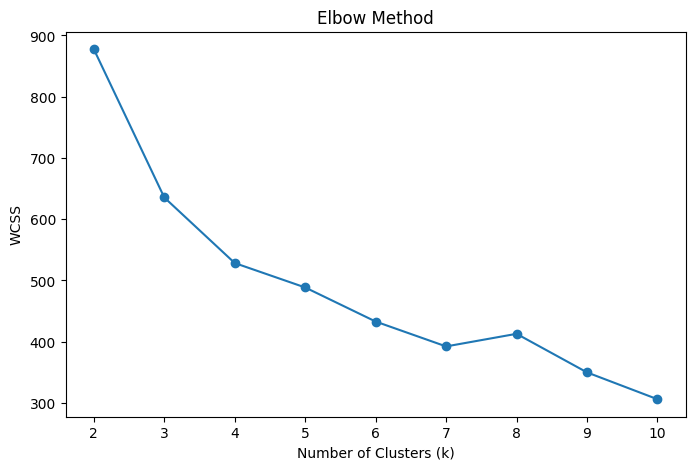

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


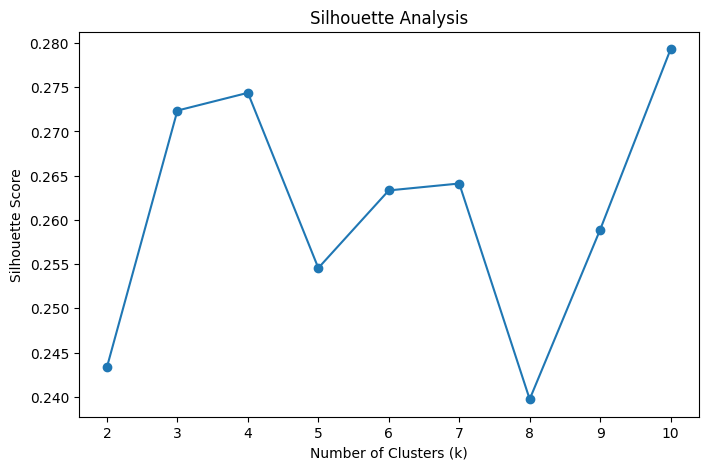

In [46]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()


In [47]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

dataset["cluster"] = clusters


In [48]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

dataset["cluster"] = clusters
    

In [49]:
cluster_summary = dataset.groupby("cluster")[
    [
        "gpa_score",
        "stress_score",
        "sleep_score",
        "mental_wellbeing_score",
        "career_clarity_score",
        "skill_readiness_score",
        "APS",
        "WWS",
        "PTMS",
        "CRS"
    ]
].mean()

cluster_summary


,gpa_score,stress_score,sleep_score,mental_wellbeing_score,career_clarity_score,skill_readiness_score,APS,WWS,PTMS,CRS
cluster,,,,,,,,,,
0,48.818182,19.090909,57.727273,36.363636,25.454545,25.454545,49.936364,38.000000,31.872727,28.472727
1,77.152174,62.391304,83.396739,65.000000,61.956522,63.260870,76.830435,71.315217,44.604348,62.991304
2,80.348837,31.860465,79.244186,33.488372,56.976744,54.418605,79.160465,51.139535,38.334884,57.111628
3,89.200000,73.000000,95.500000,75.000000,72.000000,75.000000,89.540000,82.400000,84.000000,76.100000


In [50]:
dataset["cluster"].value_counts()


cluster
1    46
2    43
0    11
3    10
Name: count, dtype: int64

In [53]:
dataset.groupby("cluster")["SRI"].mean()




cluster
0    38.143636
1    64.627283
2    57.539070
3    83.682000
Name: SRI, dtype: float64

In [56]:
cluster_labels = {
    0: "At-Risk Students",
    1: "Moderate / Balanced Performers",
    2: "Academically Strong but Mentally Vulnerable",
    3: "High Performers"
}

dataset["cluster_label"] = dataset["cluster"].map(cluster_labels)



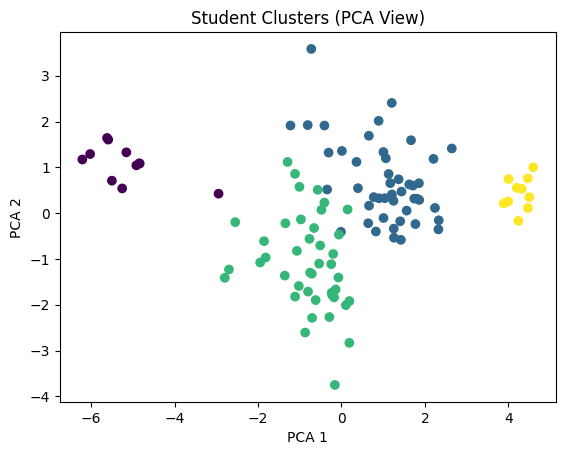

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

plt.scatter(pca_data[:,0], pca_data[:,1], c=dataset["cluster"])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Student Clusters (PCA View)")
plt.show()
